In [1]:
from statistics import mean
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.ticker as ticker
import json
import os
import numpy as np
from collections import defaultdict
from scipy.interpolate import make_interp_spline

In [33]:
ont = "wines-ontology"
depth = 4
ont_label = "Wines"
colour = "blueviolet"
temps = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]

In [34]:
base_results_dir = f"/home/upal/Projects/onto-pop-temp-var-exp/code/results/gpt-4o/{ont}"

In [35]:
results = defaultdict(list)

In [36]:
for temp in temps:
    for run in os.listdir(os.path.join(base_results_dir, f"t{temp}", "runs")):
        with open(os.path.join(base_results_dir, f"t{temp}", "runs", run, "pred_metrics.json"), "r") as f:
            metrics = json.load(f)
        results[temp].append(metrics[f"map_{depth}"])
        

In [37]:
results

defaultdict(list,
            {0.0: [0.9019866385372715,
              0.900755977496484,
              0.8935917721518988,
              0.8991736990154713,
              0.8879658931082982,
              0.8945587201125176,
              0.8931962025316456,
              0.8974156118143459,
              0.8995692686357244,
              0.902558016877637],
             0.2: [0.8803621659634319,
              0.8906469760900141,
              0.8916139240506329,
              0.8628691983122363,
              0.8813291139240507,
              0.8838783403656821,
              0.876318565400844,
              0.8792194092827004,
              0.8868670886075949,
              0.8693301687763713],
             0.4: [0.8776810829817159,
              0.8853287623066105,
              0.8830872011251758,
              0.8956135724331927,
              0.8862957102672293,
              0.8827355836849509,
              0.8864715189873418,
              0.8746044303797469,
              0.

In [38]:
avg = {k: mean(v) for k, v in results.items()}

In [39]:
avg

{0.0: 0.8970771800281294,
 0.2: 0.8802434950773559,
 0.4: 0.8847793600562588,
 0.6: 0.8766833684950773,
 0.8: 0.8353199718706048,
 1.0: 0.7936840717299578}

In [40]:
yerrslow = {k: mean(v) - min(v) for k,v in results.items()}

In [41]:
yerrsup = {k: max(v) - mean(v) for k,v in results.items()}

In [42]:
yerrslow

{0.0: 0.009111286919831207,
 0.2: 0.01737429676511959,
 0.4: 0.010174929676511901,
 0.6: 0.014209739803094146,
 0.8: 0.011260548523206793,
 1.0: 0.03436620956399439}

In [43]:
yerrsup

{0.0: 0.00548083684950762,
 0.2: 0.011370428973277003,
 0.4: 0.010834212376933938,
 0.6: 0.012864803094233546,
 0.8: 0.01146272855133601,
 1.0: 0.025232946554149094}

In [44]:
lines = {'linestyle': 'None'}
plt.rc('lines', **lines)

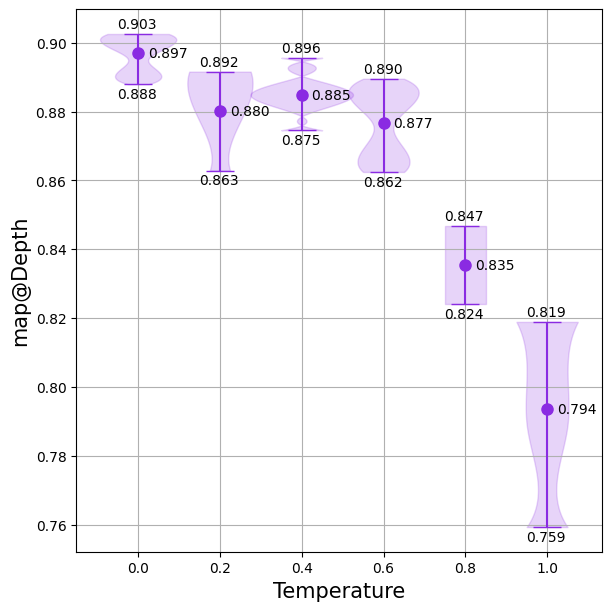

In [45]:
fig, axs = plt.subplots(1, 1, figsize=(6, 6), layout="constrained")
for i, temp in enumerate(temps):
    axs.annotate(str(f"{avg[temp]:.{3}f}"),
                     xy=(temp, avg[temp]),
                     xytext=(7,-3),
                     textcoords='offset points')
    axs.annotate(str(f"{avg[temp]-yerrslow[temp]:.{3}f}"),
                 xy=(temp, avg[temp]-yerrslow[temp]),
                 xytext=(-15,-10),
                 textcoords='offset points')
    axs.annotate(str(f"{avg[temp]+yerrsup[temp]:.{3}f}"),
                 xy=(temp, avg[temp]+yerrsup[temp]),
                 xytext=(-15,4),
                 textcoords='offset points')
    val_range = np.linspace(min(results[temp]), max(results[temp]), num=5)
    density, edges = np.histogram(results[temp], density=True, bins=5, range=(min(results[temp]), max(results[temp])))
    density = density/np.sum(density)
    xnew = np.linspace(val_range.min(), val_range.max(), 300) 
    spl = make_interp_spline(val_range, density, k=3)  # type: BSpline
    density = spl(xnew)

    
    density_l = temp - density/4.0
    density_r = temp  + density/4.0
    # print(density_l, density_r)
    # y_values = np.arange(
    # axs.fill_betweenx(sorted(values[llm_name][xticks[i]]), density_l, density_r, color=llm_stats[llm_name]["color"], alpha=0.2)
    axs.fill_betweenx(xnew, density_l, density_r, color=colour, alpha=0.2)

    # print(values[llm_name])
    axs.errorbar(temp,
                 avg[temp],
                 yerr=[[yerrslow[temp]], [yerrsup[temp]]],
                 fmt='o', markersize=8, capsize=10, color=colour)
axs.grid('on')
axs.set_xlabel("Temperature", fontsize=15)
axs.set_ylabel("map@Depth", fontsize=15)
plt.savefig(f"/home/upal/Projects/onto-pop-temp-var-exp/notes/assets/gpt-4o-wines-ontology-temp-var.pdf", format="pdf")